In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/price.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000


In [ ]:
dataset['Mean'] = (dataset['High'] + dataset['Low'])/2
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200,3.327143
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000,3.400893


In [ ]:
steps = -1
dataset_for_prediction = dataset.copy()
dataset_for_prediction['Actual'] = dataset_for_prediction['Mean'].shift(steps)
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143


In [ ]:
dataset_for_prediction = dataset_for_prediction.dropna()

In [ ]:
dataset_for_prediction['Date'] = pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index = dataset_for_prediction['Date']

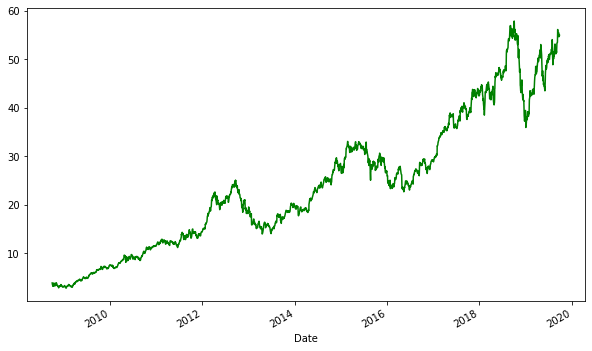

In [ ]:
dataset_for_prediction['Mean'].plot(color = 'green', figsize = (10,6))


In [ ]:
import statsmodels.api as sm

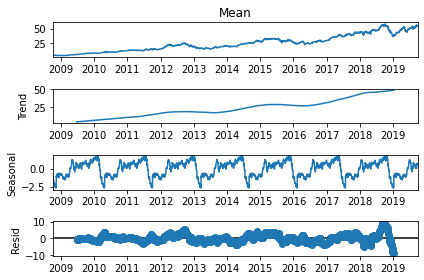

In [ ]:
sd = sm.tsa.seasonal_decompose(dataset_for_prediction['Mean'], model = 'add', period = 365);
fig = sd.plot()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc_in = MinMaxScaler(feature_range= (0,1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['Low', 'High', 'Open', 'Close','Volume', 'Adj Close', 'Mean']])
scaled_input = pd.DataFrame(scaled_input)

X = scaled_input

In [ ]:
sc_in = MinMaxScaler(feature_range= (0,1))
scaled_output = sc_in.fit_transform(dataset_for_prediction[['Actual']])
scaled_output = pd.DataFrame(scaled_output)

Y = scaled_output

In [ ]:
from scipy.sparse import data
X.rename(columns = {0:'Low', 1: 'High', 2: 'Open', 3: 'Close', 4: 'Volume', 5: 'Adj Close', 6: 'Mean'}, inplace = True)
X.index = dataset_for_prediction.index
X.head(2)

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


In [ ]:
Y.rename(columns = {0:'Preco_acao'}, inplace = True)
Y.index = dataset_for_prediction.index
Y.head(2)

,Preco_acao
Date,
2008-10-01,0.015763
2008-10-02,0.013284


In [ ]:
train_size = int(len(dataset) * 0.7)
test_size = int(len(dataset)) - train_size

In [ ]:
train_x, train_y = X[:train_size].dropna(), Y[:train_size].dropna()
test_x, test_y = X[train_size:].dropna(), Y[train_size:].dropna()

In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
step_wise = auto_arima(train_y,
                       exogenous = train_x,
                       start_p = 1,
                       start_q = 1,
                       max_p = 7,
                       max_q = 7,
                       d = 1,
                       max_d = 7,
                       trace = True,
                       error_action = 'ignore',
                       suppress_warnings= True,
                       stepwise = True
                       )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15130.709, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15077.042, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15127.374, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15132.095, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15075.928, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15130.986, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15130.275, Time=1.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15131.797, Time=0.49 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 4.396 seconds


In [ ]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1936
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7569.047
Date:                Mon, 21 Nov 2022   AIC                         -15132.095
Time:                        21:54:18   BIC                         -15115.391
Sample:                             0   HQIC                        -15125.952
                               - 1936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.414      0.157    -7.4e-05       0.000
ma.L1          0.1723      0.013     13.155      0.000       0.147       0.198
sigma2      2.339e-05   3.08e-07     75.974      0.000    2.28e-05     2.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9198.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train_y,
                exog = train_x,
                order = (0,1,1),
                enforce_invertibility= False,
                enforce_stationarity= False)

In [ ]:
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
predicoes = results.predict(start = train_size, end = train_size+test_size+(steps)-1, exog = test_x)

In [ ]:
act = pd.DataFrame(scaled_output.iloc[train_size:, 0])
act.index = test_x.index

In [ ]:
predicoes = pd.DataFrame(predicoes)
predicoes.reset_index(drop = True, inplace = True)
predicoes.index = test_x.index
predicoes['Actual']= act['Preco_acao']
predicoes.rename(columns = {0:'Pred'}, inplace = True)

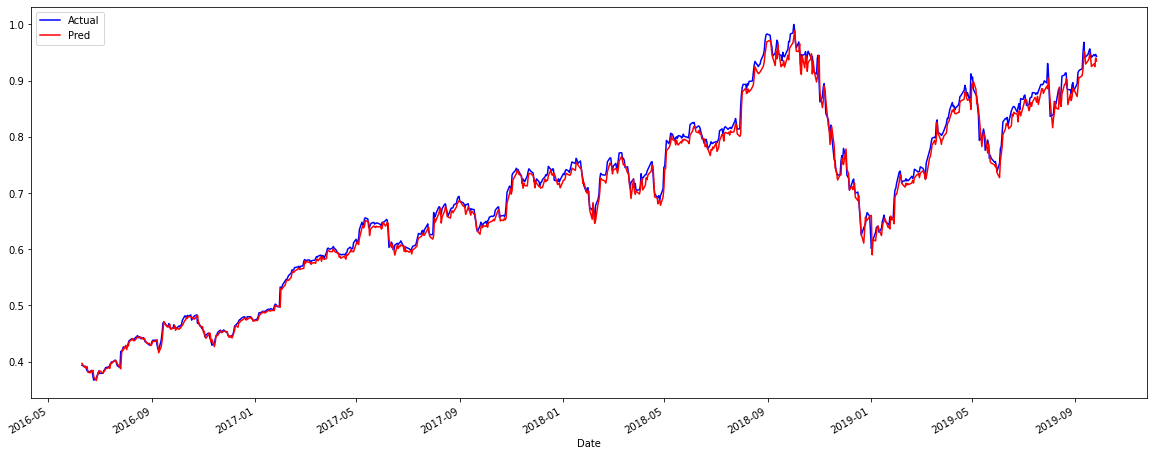

In [ ]:
predicoes["Actual"].plot(figsize=(20,8), legend=True, color="blue")
predicoes["Pred"].plot(legend=True, color="red", figsize=(20,8))

In [ ]:
from statsmodels.tools.eval_measures import mse
error = mse(predicoes['Pred'], predicoes['Actual'])
error

0.0001464362132657701